## Comparazione modello fatto per il progetto e il modello di pyTorch
con:
- batch_size = numero totale di sample
- epoch = 1
(N.B. ci potrebbero essere delle differenze a causa delle approssimazioni usate dai due modelli. Se si aumenta l'epoch e il learning_rate, le differenze aumentano)

In [100]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
sys.path.append('../') #server per fare l'import di file in un'altra directory sullo stesso "livello"
from src.NeuralNetwork import Layer, NeuralNetwork
from src.function import IdentityFunction

In [101]:
X = torch.rand(10, 2)
y = X*2
learning_rate = 0.001
regularization_term = 0

epoch = 1000

In [102]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 3)
        self.fc3 = nn.Linear(3, 2)
        self.fc4 = nn.Linear(2, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

# funzione loss usata nel corso
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, target_output, output_nn):
        error_vector = (target_output - output_nn)**2 / 2
        error_total = error_vector.sum()
        return error_total

# funzione loss usata nel corso
class CustomError(nn.Module):
    def __init__(self):
        super(CustomError, self).__init__()

    def forward(self, target_output, output_nn):
        error_vector = (target_output - output_nn)**2
        error_total = error_vector.sum()
        return error_total

model = Net()

# Impostiamo a 0 i bias
model.fc1.bias = nn.Parameter(torch.zeros(2))
model.fc2.bias = nn.Parameter(torch.zeros(3))
model.fc3.bias = nn.Parameter(torch.zeros(2))
model.fc4.bias = nn.Parameter(torch.zeros(2))

In [103]:
import numpy as np

layer1 = Layer(num_neurons=2, num_inputs=2, activation_function=IdentityFunction())
layer2 = Layer(num_neurons=3, num_inputs=2, activation_function=IdentityFunction())
layer3 = Layer(num_neurons=2, num_inputs=3, activation_function=IdentityFunction())
layer4 = Layer(num_neurons=2, num_inputs=2, activation_function=IdentityFunction())

layer1.weights = np.matrix(model.fc1.weight.detach().numpy())
layer2.weights = np.matrix(model.fc2.weight.detach().numpy())
layer3.weights = np.matrix(model.fc3.weight.detach().numpy())
layer4.weights = np.matrix(model.fc4.weight.detach().numpy())

neuralNetwork = NeuralNetwork([layer1, layer2, layer3, layer4])
target_inputs =  np.matrix(X.numpy())
target_outputs = np.matrix(y.numpy())

error_history = neuralNetwork.train(target_inputs, target_outputs, learning_rate=learning_rate,
                                    regularization_term=regularization_term, epochs=epoch)

In [104]:
error_history_torch = []
for _ in range(epoch):
    # Define the loss function
    loss_fn = CustomLoss()
    error_fn = CustomError()

    y_pred = model(X)
    loss = loss_fn(target_output = y, output_nn = y_pred)
    error = error_fn(target_output = y, output_nn = y_pred)
    error_history_torch.append(error.item())

    loss.backward()

    # Manually update the weights
    with torch.no_grad():
        for param in model.parameters():
            param += -(learning_rate * param.grad)

    model.zero_grad()

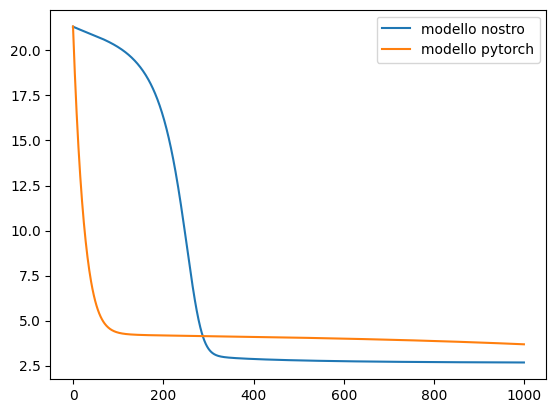

In [118]:
plt.plot(error_history, label='modello nostro')
plt.plot(error_history_torch, label='modello pytorch')
plt.legend()

In [ ]:
tolerance = 0.001
# Ci sono delle differenze di approssimazione tra i due modelli
assert np.all(np.abs(np.matrix(layer1.weights) - np.matrix(model.fc1.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer2.weights) - np.matrix(model.fc2.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer3.weights) - np.matrix(model.fc3.weight.detach().numpy())) < tolerance)
assert np.all(np.abs(np.matrix(layer4.weights) - np.matrix(model.fc4.weight.detach().numpy())) < tolerance)